In [1]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle

In [2]:
def get_mass_from_pdgid(pdgid):
    try:
        particle_info = particle.Particle.from_pdgid(pdgid)
        if particle_info is not None:
            return particle_info.mass
        else:
            return np.NaN
    except Exception as e:
        print(f"Error occurred for PDG ID {pdgid}: {e}")
        return np.NaN

In [3]:
tree = upr.open("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.edep-sim.analysed.root")['edep_extended']

In [4]:
tree.keys()

['FileName',
 'EventId',
 'EventType',
 'NofEvents',
 'PrimariesVertexX',
 'PrimariesVertexY',
 'PrimariesVertexZ',
 'PrimariesVertexT',
 'PrimariesName',
 'PrimariesPDG',
 'PrimariesP4',
 'NofPrimaries',
 'PrimariesHitsX',
 'PrimariesHitsY',
 'PrimariesHitsZ',
 'PrimariesFirstTimeECAL',
 'PrimariesTrackId',
 'PrimariesEDepECAL']

In [5]:
df = tree.arrays([
 'FileName',
 'EventId',
 'EventType',
 'NofEvents',
 'PrimariesVertexX',
 'PrimariesVertexY',
 'PrimariesVertexZ',
 'PrimariesVertexT',
 'NofPrimaries',
 ],library='pd')
 
df

,,FileName,EventId,EventType,NofEvents,PrimariesVertexX,PrimariesVertexY,PrimariesVertexZ,PrimariesVertexT,NofPrimaries
entry,subentry,,,,,,,,,
0,0,events-in-SANDtracker.749.gtrac.root:gRooTrack...,0,QES,1,-1614.751489,-3311.794589,23829.154505,1.0,5
1,0,events-in-SANDtracker.749.gtrac.root:gRooTrack...,1,QES,1,1532.618012,-4304.993373,24318.192689,1.0,4
2,0,events-in-SANDtracker.749.gtrac.root:gRooTrack...,2,QES,1,-582.075408,-1723.498596,25464.545019,1.0,3
3,0,events-in-SANDtracker.749.gtrac.root:gRooTrack...,3,RES,1,-614.243451,-3654.258866,25255.499873,1.0,8
4,0,events-in-SANDtracker.749.gtrac.root:gRooTrack...,4,QES,1,-1683.384534,-2993.640649,23575.159566,1.0,2
...,...,...,...,...,...,...,...,...,...,...
18274,0,events-in-SANDtracker.751.gtrac.root:gRooTrack...,461,DIS,1,-1395.960164,-3409.778627,23291.142804,1.0,6
18275,0,events-in-SANDtracker.751.gtrac.root:gRooTrack...,462,DIS,1,-1037.854813,-1904.745754,23791.593556,1.0,3
18276,0,events-in-SANDtracker.751.gtrac.root:gRooTrack...,463,RES,1,1620.278850,-1633.692119,23651.550264,1.0,13


Text(0.5, 0.98, '$\\overline{\\nu}_\\mu$ vertex position')

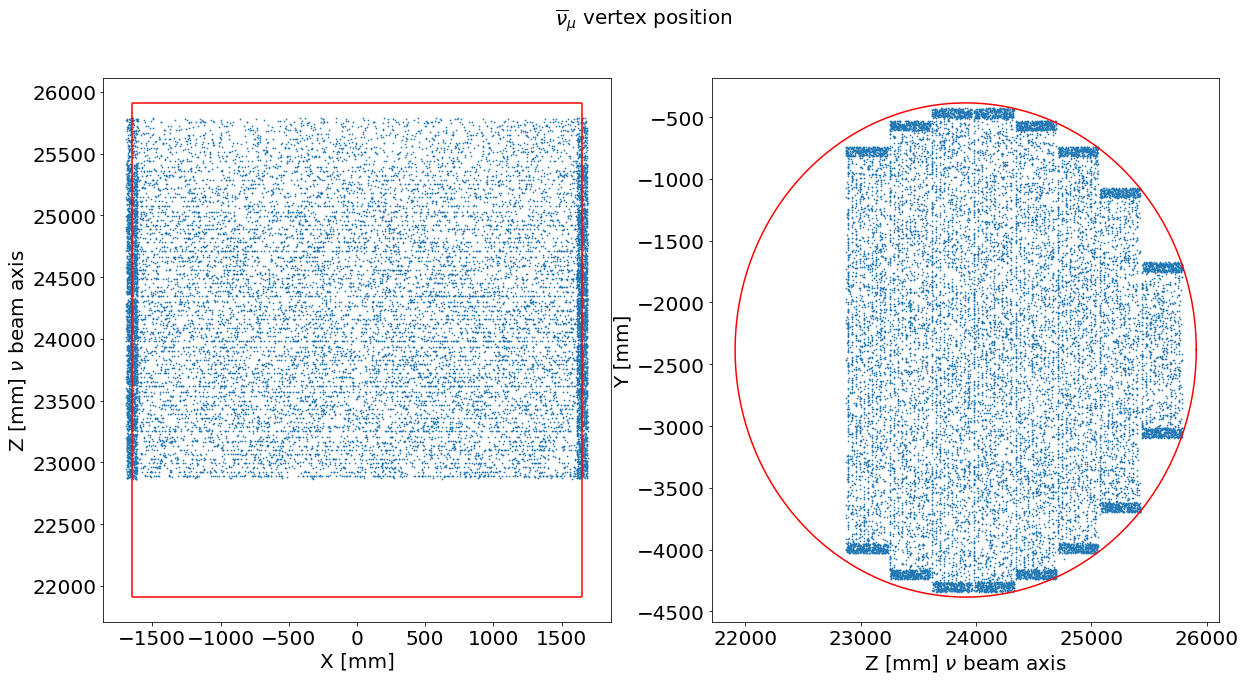

In [6]:
sand_center = [0, -2384.73, 23910]
sand_radius = 2000
theta = np.linspace(0, 2*np.pi, 100000)
z_sand = sand_center[2] + sand_radius * np.cos(theta)
y_sand = sand_center[1] + sand_radius * np.sin(theta)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(x = df["PrimariesVertexX"], y = df["PrimariesVertexZ"], s = 0.5)
ax[1].scatter(x = df["PrimariesVertexZ"], y = df["PrimariesVertexY"], s = 0.5)

ax[0].vlines(-1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red', label='SAND')
ax[0].vlines(+1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red')
ax[0].hlines(sand_center[2] - sand_radius, -1650, 1650, color='red')
ax[0].hlines(sand_center[2] + sand_radius, -1650, 1650, color='red')
ax[1].plot(z_sand, y_sand, linestyle='-', color='red', label = 'SAND')

ax[0].set_xlabel("X [mm]", fontsize=20)
ax[0].set_ylabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[0].tick_params(labelsize=20)
ax[1].set_xlabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[1].set_ylabel("Y [mm]", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.suptitle(r"$\overline{\nu}_\mu$ vertex position", fontsize=20)

In [7]:
new_columns = {
    ('EventType','',''): 'EventType',
    ('FileName','',''): 'FileName',
    ('PrimariesPDG','',''): 'PDG',
    ('PrimariesTrackId','',''): 'TrackId',
    ('PrimariesP4', 'fP', 'fX'): 'Px',
    ('PrimariesP4', 'fP', 'fY'): 'Py',
    ('PrimariesP4', 'fP', 'fZ'): 'Pz',
    ('PrimariesHitsX', '', ''): 'HitX',
    ('PrimariesHitsY', '', ''): 'HitY',
    ('PrimariesHitsZ', '', ''): 'HitZ',
    ('PrimariesP4', 'fE', ''): 'E',
    ('PrimariesEDepECAL', '', ''): 'EDepECAL',
    ('PrimariesFirstTimeECAL', '', ''): 'FirstTimeECAL',
}

primaries = tree.arrays([
'EventType',
'FileName',
'PrimariesPDG',
'PrimariesTrackId',
'PrimariesP4',
"PrimariesHitsX",
"PrimariesHitsY",
"PrimariesHitsZ",
'PrimariesEDepECAL',
'PrimariesFirstTimeECAL',
 ],library='pd').rename(columns=new_columns)

primaries = primaries.set_index([
                    'EventType',
                    'FileName'], append=True).reorder_levels([
                                                            'entry',
                                                            'subentry',
                                                            'EventType',
                                                            'FileName'
                                                            ])
primaries["mass"] = primaries['PDG'].apply(get_mass_from_pdgid)
primaries["E_kin"] = primaries['E'] - primaries['mass']
primaries["gamma"] = primaries['E'] / (primaries["mass"])
primaries["beta"] =np.sqrt(1. - 1. / primaries["gamma"].values**2)
primaries
#  primaries[primaries.index.get_level_values(3)!='COH']

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt


PDG  \
entry subentry EventType FileName                                                   
0     0        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0   -13   
      1        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  2212   
      2        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  2112   
      3        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  2112   
      4        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  2112   
...                                                                           ...   
18277 1        DIS       events-in-SANDtracker.751.gtrac.root:gRooTracke...  2212   
      2        DIS       events-in-SANDtracker.751.gtrac.root:gRooTracke...  -211   
18278 0        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...   -13   
      1        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...  2212   
      2        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...  2112   

                                                                             TrackId  \
entry subentry EventType FileName                                                      
0     0        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0        0   
      1        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0        1   
      2        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0        2   
      3        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0        3   
      4        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0        4   
...                                                                              ...   
18277 1        DIS       events-in-SANDtracker.751.gtrac.root:gRooTracke...        1   
      2        DIS       events-in-SANDtracker.751.gtrac.root:gRooTracke...        2   
18278 0        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...        0   
      1        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...        1   
      2        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...        2   

                                                                                     Px  \
entry subentry EventType FileName                                                         
0     0        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0 -207.212138   
      1        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  -24.095289   
      2        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  -87.144384   
      3        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  362.694935   
      4        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  151.978230   
...                                                                                 ...   
18277 1        DIS       events-in-SANDtracker.751.gtrac.root:gRooTracke...  303.453750   
      2        DIS       events-in-SANDtracker.751.gtrac.root:gRooTracke...  205.938985   
18278 0        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...  177.632497   
      1        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...   24.742820   
      2        QES       events-in-SANDtracker.751.gtrac.root:gRooTracke...  109.199956   

                                                                                      Py  \
entry subentry EventType FileName                                                          
0     0        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0  -226.586457   
      1        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0   -58.260187   
      2        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0   -14.189557   
      3        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0    34.281117   
      4        QES       events-in-SANDtracker.749.gtrac.root:gRooTracker:0   160.113477   

Text(0.5, 0.98, '$\\overline{\\nu}_\\mu$ vertex position')

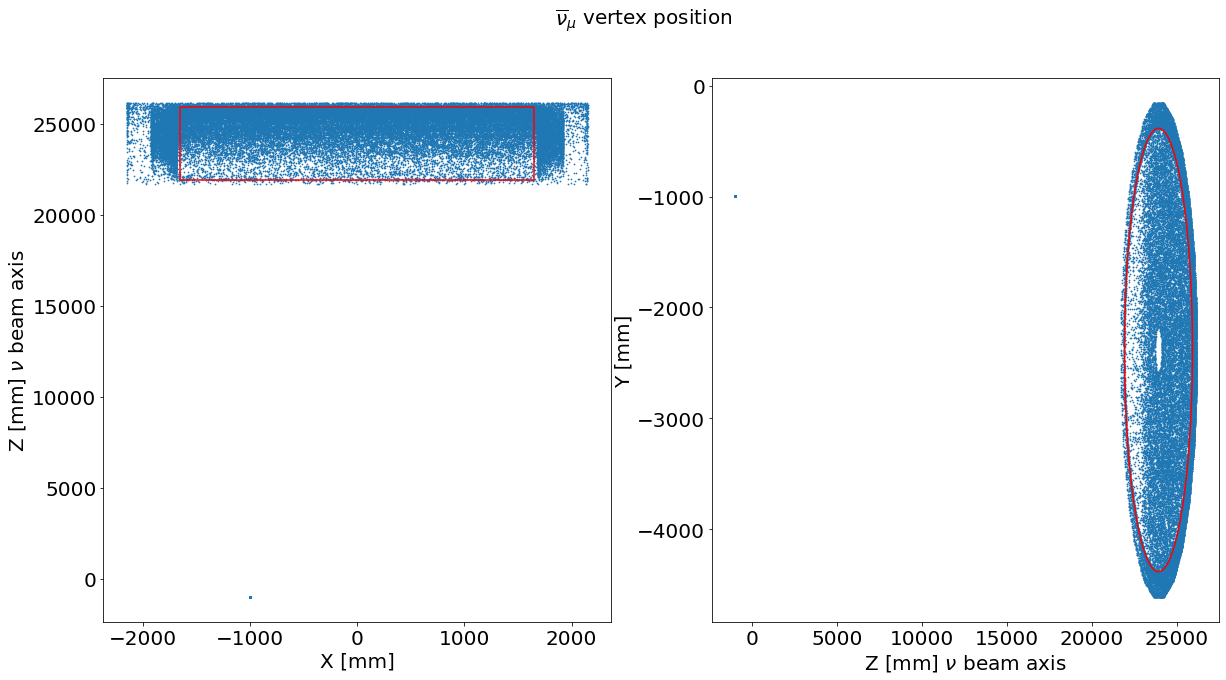

In [8]:
sand_center = [0, -2384.73, 23910]
sand_radius = 2000
theta = np.linspace(0, 2*np.pi, 100000)
z_sand = sand_center[2] + sand_radius * np.cos(theta)
y_sand = sand_center[1] + sand_radius * np.sin(theta)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(x = primaries["HitX"], y = primaries["HitZ"], s = 0.5)
ax[1].scatter(x = primaries["HitZ"], y = primaries["HitY"], s = 0.5)

ax[0].vlines(-1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red', label='SAND')
ax[0].vlines(+1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red')
ax[0].hlines(sand_center[2] - sand_radius, -1650, 1650, color='red')
ax[0].hlines(sand_center[2] + sand_radius, -1650, 1650, color='red')
ax[1].plot(z_sand, y_sand, linestyle='-', color='red', label = 'SAND')

ax[0].set_xlabel("X [mm]", fontsize=20)
ax[0].set_ylabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[0].tick_params(labelsize=20)
ax[1].set_xlabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[1].set_ylabel("Y [mm]", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.suptitle(r"$\overline{\nu}_\mu$ vertex position", fontsize=20)

In [216]:
primaries_ = primaries[primaries.FirstTimeECAL!=-999]

Text(0.5, 0.98, 'Time of First Hit in ECAL')

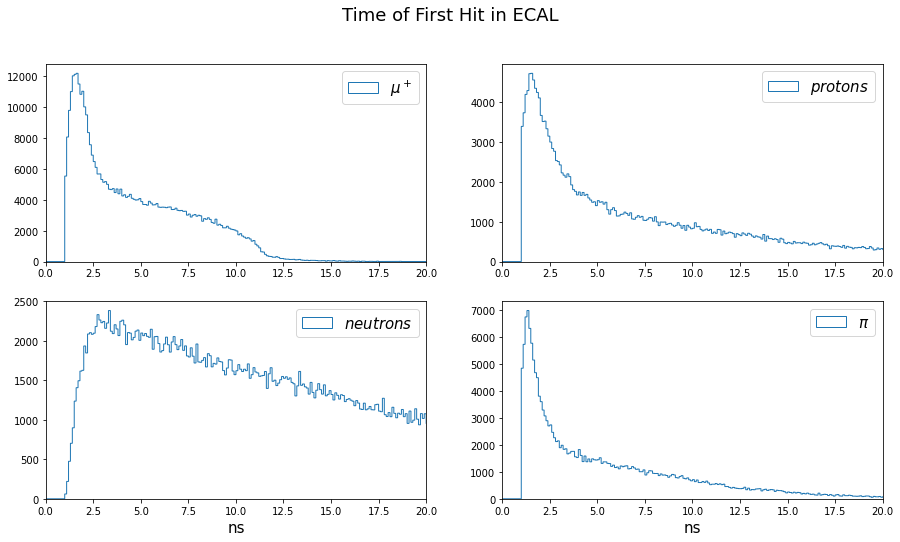

In [240]:
fig, ax = plt.subplots(2,2,figsize=(15,8))

ax[0,0].hist(x = primaries_[primaries_.PDG==-13]['FirstTimeECAL'], label=r'$\mu^+$',
        histtype='step', bins=np.arange(0, 1000, 0.1))

ax[0,1].hist(x = primaries_[primaries_.PDG==2212]['FirstTimeECAL'], label=r'$protons$',
        histtype='step', bins=np.arange(0, 1000, 0.1))

ax[1,0].hist(x = primaries_[primaries_.PDG==2112]['FirstTimeECAL'], label=r'$neutrons$',
        histtype='step', bins=np.arange(0, 1000, 0.1))

ax[1,1].hist(x = primaries_[(primaries_.PDG==111) | (primaries_.PDG==221) | (primaries_.PDG==-211)]['FirstTimeECAL'], label=r'$\pi$',
        histtype='step', bins=np.arange(0, 1000, 0.1))

# ax.set_yscale('log')
ax[0,0].legend(fontsize=15)
ax[0,0].set_xlim(0,20)

ax[0,1].legend(fontsize=15)
ax[0,1].set_xlim(0,20)

ax[1,0].legend(fontsize=15)
ax[1,0].set_xlim(0,20)
ax[1,0].set_xlabel("ns", fontsize=15)

ax[1,1].legend(fontsize=15)
ax[1,1].set_xlim(0,20)
ax[1,1].set_xlabel("ns", fontsize=15)


plt.suptitle("Time of First Hit in ECAL", fontsize=18)
# ax.set_xlim(0,20)


In [ ]:
fig, ax = plt.subplot()



Text(0.5, 0.98, 'beta relativistic primaries')

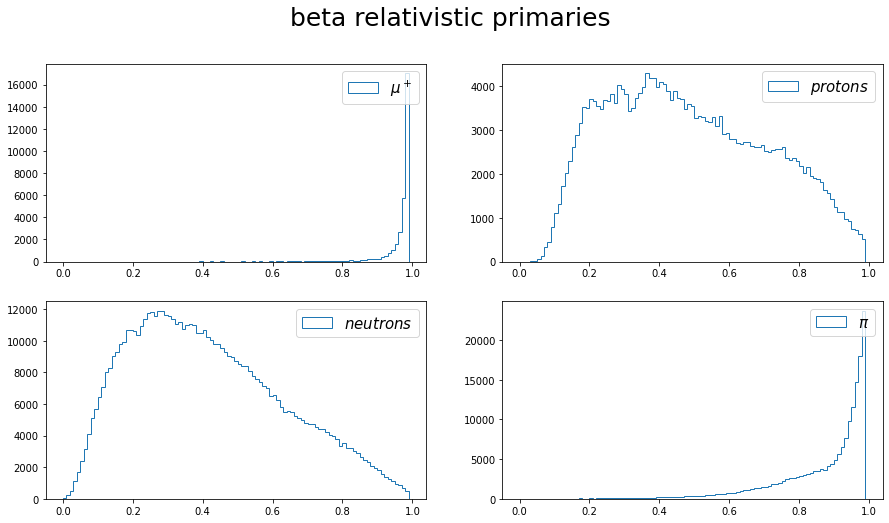

In [225]:
fig, ax = plt.subplots(2,2,figsize=(15,8))

ax[0,0].hist(x = primaries_[primaries_.PDG==-13]['beta'], label=r'$\mu^+$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01)
        )

ax[0,1].hist(x = primaries_[primaries_.PDG==2212]['beta'], label=r'$protons$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01)
        )

ax[1,0].hist(x = primaries_[primaries_.PDG==2112]['beta'], label=r'$neutrons$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01)
        )

ax[1,1].hist(x = primaries_[(primaries_.PDG==111) | (primaries_.PDG==221) | (primaries_.PDG==-211)]['beta'], label=r'$\pi$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01)
        )

# ax.set_yscale('log')
ax[0,0].legend(fontsize=15)
# ax[0,0].set_xlim(0,15)

ax[0,1].legend(fontsize=15)
# ax[0,1].set_xlim(0,20)

ax[1,0].legend(fontsize=15)
# ax[1,0].set_xlim(0,50)
# ax[1,0].set_xlabel("beta", fontsize=15)

ax[1,1].legend(fontsize=15)
# ax[1,1].set_xlim(0,20)
# ax[1,1].set_xlabel("beta", fontsize=15)


plt.suptitle("beta relativistic primaries", fontsize=25)
# ax.set_xlim(0,20)

Text(0.5, 0.98, 'Total Energy deposition in ECAL')

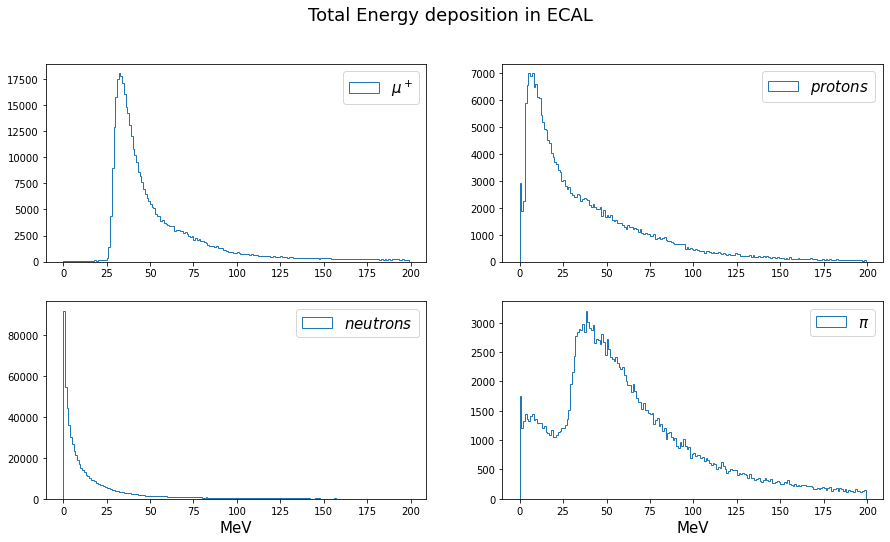

In [222]:
primaries__ = primaries_[primaries_.EDepECAL!=0]

fig, ax = plt.subplots(2,2,figsize=(15,8))

ax[0,0].hist(x = primaries__[primaries__.PDG==-13]['EDepECAL'], label=r'$\mu^+$',
        histtype='step', 
        bins=np.arange(0, 200, 1)
        )
ax[0,1].hist(x = primaries__[primaries__.PDG==2212]['EDepECAL'], label=r'$protons$',
        histtype='step', 
        bins=np.arange(0, 200, 1)
        )
ax[1,0].hist(x = primaries__[primaries__.PDG==2112]['EDepECAL'], label=r'$neutrons$',
        histtype='step', 
        bins=np.arange(0, 200, 1)
        )
ax[1,1].hist(x = primaries__[(primaries__.PDG==111) | (primaries__.PDG==221) | (primaries__.PDG==-211)]['EDepECAL'], label=r'$\pi$',
        histtype='step', 
        bins=np.arange(0, 200, 1)
        )

# ax.set_yscale('log')
ax[0,0].legend(fontsize=15)

ax[0,1].legend(fontsize=15)

ax[1,0].legend(fontsize=15)
ax[1,0].set_xlabel("MeV", fontsize=15)

ax[1,1].legend(fontsize=15)
ax[1,1].set_xlabel("MeV", fontsize=15)

plt.suptitle("Total Energy deposition in ECAL", fontsize=18)
# ax.set_xlim(0,1)